In [5]:
import pandas as pd
from pandas import DataFrame
import csv
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import seaborn as sns
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import ttest_ind
from scipy.stats import norm
from scipy.stats import pearsonr
from scipy.stats import random_correlation
from IPython.display import IFrame
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
from sklearn.cluster import KMeans
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

In [9]:
spotify_load_data="Spotify1.csv"

In [10]:
spotify_df1=pd.read_csv(spotify_load_data)
spotify_df1.head()

,Position,Artist,Song,Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,883369738
1,2,Juice WRLD,Lucid Dreams,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,781153024
3,4,J. Cole,No Role Modelz,734857487
4,5,Post Malone,rockstar,718865961


In [11]:
# Files to load
spotify_data_to_load="spotify1.csv"
spotify_data_to_load2="spotify_2.csv"
spotify_data_to_load3="online_presence2.csv"
spotify_data_to_load4="youtube_popular.csv"
spotify_data_to_load5="topIG.csv"

In [12]:
# read data and store in pandas
spotify1 = pd.read_csv(spotify_data_to_load)
spotify_2=pd.read_csv(spotify_data_to_load2)
online_presence=pd.read_csv(spotify_data_to_load3)
youtube_popular=pd.read_csv(spotify_data_to_load4)
topIG=pd.read_csv(spotify_data_to_load5) 

In [13]:
spotify1.head()

,Position,Artist,Song,Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,883369738
1,2,Juice WRLD,Lucid Dreams,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,781153024
3,4,J. Cole,No Role Modelz,734857487
4,5,Post Malone,rockstar,718865961


In [14]:
spotify_2.head()

,Position,Song,Streams,Artist,Release Date
0,1,Shape of You,3327000,Ed Sheeran,1/6/2017
1,2,Blinding Lights,3323000,The Weeknd,11/29/2019
2,3,Dance Monkey,2721000,Tones And I,5/10/2019
3,4,Someone You Loved,2588000,Lewis Capaldi,11/8/2018
4,5,Rockstar,2570000,Post Malone featuring 21 Savage,9/15/2017


In [15]:
online_presence.head()

,Position,Artist,Category,Followers,Biggest Platform
0,2,Justin Bieber,Music,"455,000,000",Instagram
1,3,Ariana Grande,Music,"429,000,000",Instagram
2,4,Selena Gomez,Music,"425,000,000",Instagram
3,5,Taylor Swift,Music,"361,000,000",Instagram
4,7,Katy Perry,Music,"338,000,000",Instagram


In [16]:
youtube_popular.head()

,Position,Artist,Subscribers,Views,Video Count,Category,Release Date
0,1,T-Series,222000000,19845000000,17317,Music,2006
1,12,Zee Music Company,86700000,49067711243,6603,Music,2014
2,19,BANGTANTV,70000000,17471090750,1787,Music,2012
3,20,Justin Bieber,69700000,28567240999,247,Music,2007
4,21,HYBE LABELS,67800000,24013849120,971,Music,2008


In [17]:
youtube_popular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Position      222 non-null    int64 
 1   Artist        222 non-null    object
 2   Subscribers   222 non-null    int64 
 3   Views         222 non-null    int64 
 4   Video Count   222 non-null    int64 
 5   Category      222 non-null    object
 6   Release Date  222 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 12.3+ KB


In [18]:
topIG.head()

,Country,Position,Account,Artist,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
0,All,9,arianagrande,Ariana Grande,https://www.instagram.com/arianagrande/,Music,294100000,United States,1700000,2400000,2/7/2022 16:50
1,All,10,billieeilish,BILLIE EILISH,https://www.instagram.com/billieeilish/,Music,100000000,United States,5300000,7000000,2/7/2022 16:50
2,All,12,lalalalisa_m,LISA,https://www.instagram.com/lalalalisa_m/,Music,73100000,Indonesia,7500000,8600000,2/7/2022 16:50
3,All,13,jennierubyjane,J,https://www.instagram.com/jennierubyjane/,Music,62300000,Indonesia,6400000,7600000,2/7/2022 16:50
4,All,20,justinbieber,Justin Bieber,https://www.instagram.com/justinbieber/,Music,219800000,India,1200000,1800000,2/7/2022 16:50


In [19]:
agg=pd.concat([spotify1, online_presence.reset_index(drop=True), spotify_2.reset_index(drop=True), youtube_popular.reset_index(drop=True), topIG.reset_index(drop=True)], axis=0)
agg.head()

,Position,Artist,Song,Streams,Category,Followers,Biggest Platform,Release Date,Subscribers,Views,Video Count,Country,Account,Link,Audience Country,Authentic engagement,Engagement avg,Scraped
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,883369738.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Juice WRLD,Lucid Dreams,864832399.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lil Uzi Vert,XO TOUR Llif3,781153024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,J. Cole,No Role Modelz,734857487.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Post Malone,rockstar,718865961.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11614 entries, 0 to 182
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Position              11614 non-null  int64  
 1   Artist                11608 non-null  object 
 2   Song                  11180 non-null  object 
 3   Streams               11184 non-null  float64
 4   Category              430 non-null    object 
 5   Followers             208 non-null    object 
 6   Biggest Platform      25 non-null     object 
 7   Release Date          322 non-null    object 
 8   Subscribers           222 non-null    float64
 9   Views                 222 non-null    float64
 10  Video Count           222 non-null    float64
 11  Country               183 non-null    object 
 12  Account               183 non-null    object 
 13  Link                  183 non-null    object 
 14  Audience Country      182 non-null    object 
 15  Authentic engagement 

In [21]:
agg_df=pd.concat(
map(pd.read_csv, ['spotify1.csv', 'spotify_2.csv','online_presence2.csv','youtube_popular.csv', 'topIG.csv',  ]),ignore_index=True)
agg_df.head() 

,Position,Artist,Song,Streams,Release Date,Category,Followers,Biggest Platform,Subscribers,Views,Video Count,Country,Account,Link,Audience Country,Authentic engagement,Engagement avg,Scraped
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,883369738.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Juice WRLD,Lucid Dreams,864832399.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lil Uzi Vert,XO TOUR Llif3,781153024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,J. Cole,No Role Modelz,734857487.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Post Malone,rockstar,718865961.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
pd.concat

<function pandas.core.reshape.concat.concat(objs: Union[Iterable[Union[ForwardRef('DataFrame'), ForwardRef('Series')]], Mapping[Union[Hashable, NoneType], Union[ForwardRef('DataFrame'), ForwardRef('Series')]]], axis=0, join='outer', ignore_index: bool = False, keys=None, levels=None, names=None, verify_integrity: bool = False, sort: bool = False, copy: bool = True) -> Union[ForwardRef('DataFrame'), ForwardRef('Series')]>

In [23]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11614 entries, 0 to 11613
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Position              11614 non-null  int64  
 1   Artist                11608 non-null  object 
 2   Song                  11180 non-null  object 
 3   Streams               11184 non-null  float64
 4   Release Date          322 non-null    object 
 5   Category              430 non-null    object 
 6   Followers             208 non-null    object 
 7   Biggest Platform      25 non-null     object 
 8   Subscribers           222 non-null    float64
 9   Views                 222 non-null    float64
 10  Video Count           222 non-null    float64
 11  Country               183 non-null    object 
 12  Account               183 non-null    object 
 13  Link                  183 non-null    object 
 14  Audience Country      182 non-null    object 
 15  Authentic engagemen

In [24]:
agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11614 entries, 0 to 182
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Position              11614 non-null  int64  
 1   Artist                11608 non-null  object 
 2   Song                  11180 non-null  object 
 3   Streams               11184 non-null  float64
 4   Category              430 non-null    object 
 5   Followers             208 non-null    object 
 6   Biggest Platform      25 non-null     object 
 7   Release Date          322 non-null    object 
 8   Subscribers           222 non-null    float64
 9   Views                 222 non-null    float64
 10  Video Count           222 non-null    float64
 11  Country               183 non-null    object 
 12  Account               183 non-null    object 
 13  Link                  183 non-null    object 
 14  Audience Country      182 non-null    object 
 15  Authentic engagement 

In [25]:
agg_df=agg_df[["Position", "Artist", "Song", "Release Date", "Biggest Platform", "Streams", "Followers", "Subscribers", "Views", "Video Count", "Authentic engagement", "Engagement avg"]]

In [26]:

print(agg.columns)
print(agg_df.columns)

Index(['Position', 'Artist', 'Song', 'Streams', 'Category', 'Followers',
       'Biggest Platform', 'Release Date', 'Subscribers', 'Views',
       'Video Count', 'Country', 'Account', 'Link', 'Audience Country',
       'Authentic engagement', 'Engagement avg', 'Scraped'],
      dtype='object')
Index(['Position', 'Artist', 'Song', 'Release Date', 'Biggest Platform',
       'Streams', 'Followers', 'Subscribers', 'Views', 'Video Count',
       'Authentic engagement', 'Engagement avg'],
      dtype='object')


In [27]:
agg=agg[["Position", "Artist", "Song", "Streams", "Followers", "Subscribers","Views", "Video Count", "Authentic engagement", "Engagement avg"]] 

In [28]:
agg.head()


,Position,Artist,Song,Streams,Followers,Subscribers,Views,Video Count,Authentic engagement,Engagement avg
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,883369738.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Juice WRLD,Lucid Dreams,864832399.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lil Uzi Vert,XO TOUR Llif3,781153024.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,J. Cole,No Role Modelz,734857487.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Post Malone,rockstar,718865961.0,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
agg_df.head()

,Position,Artist,Song,Release Date,Biggest Platform,Streams,Followers,Subscribers,Views,Video Count,Authentic engagement,Engagement avg
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,NaN,NaN,883369738.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Juice WRLD,Lucid Dreams,NaN,NaN,864832399.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lil Uzi Vert,XO TOUR Llif3,NaN,NaN,781153024.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,J. Cole,No Role Modelz,NaN,NaN,734857487.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Post Malone,rockstar,NaN,NaN,718865961.0,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11614 entries, 0 to 11613
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Position              11614 non-null  int64  
 1   Artist                11608 non-null  object 
 2   Song                  11180 non-null  object 
 3   Release Date          322 non-null    object 
 4   Biggest Platform      25 non-null     object 
 5   Streams               11184 non-null  float64
 6   Followers             208 non-null    object 
 7   Subscribers           222 non-null    float64
 8   Views                 222 non-null    float64
 9   Video Count           222 non-null    float64
 10  Authentic engagement  183 non-null    float64
 11  Engagement avg        183 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.1+ MB


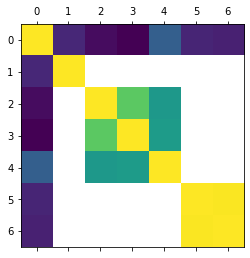

In [31]:
plt.matshow(agg_df.corr())
plt.show()

In [32]:
agg_df.describe()

,Position,Streams,Subscribers,Views,Video Count,Authentic engagement,Engagement avg
count,11614.000000,1.118400e+04,2.220000e+02,2.220000e+02,222.000000,1.830000e+02,1.830000e+02
mean,5305.771224,1.816161e+07,2.303739e+07,1.228647e+10,2298.815315,6.662803e+05,9.245306e+05
std,3308.788726,5.198310e+07,1.876792e+07,8.408765e+09,5846.831776,1.018560e+06,1.289282e+06
min,1.000000,4.432300e+04,1.090000e+07,5.469050e+08,7.000000,0.000000e+00,9.210000e+04
25%,2374.250000,3.887252e+05,1.330000e+07,6.016301e+09,123.500000,1.927000e+05,2.925500e+05
50%,5277.500000,1.704876e+06,1.700000e+07,1.022484e+10,272.000000,3.802000e+05,5.574000e+05
75%,8180.750000,1.061061e+07,2.605000e+07,1.640835e+10,1721.750000,7.118500e+05,9.687000e+05
max,11084.000000,8.833697e+08,2.220000e+08,5.065893e+10,58623.000000,7.500000e+06,8.600000e+06


In [33]:
agg_df.corr()

,Position,Streams,Subscribers,Views,Video Count,Authentic engagement,Engagement avg
Position,1.000000,-0.493547,-0.622847,-0.680927,-0.173026,-0.503685,-0.523839
Streams,-0.493547,1.000000,NaN,NaN,NaN,NaN,NaN
Subscribers,-0.622847,NaN,1.000000,0.576074,0.212340,NaN,NaN
Views,-0.680927,NaN,0.576074,1.000000,0.241844,NaN,NaN
Video Count,-0.173026,NaN,0.212340,0.241844,1.000000,NaN,NaN
Authentic engagement,-0.503685,NaN,NaN,NaN,NaN,1.000000,0.987334
Engagement avg,-0.523839,NaN,NaN,NaN,NaN,0.987334,1.000000


In [34]:
# Examine shade
print(f'We have {agg_df.shape[0]} rows and {agg_df.shape[1]} colums in dataset.')

We have 11614 rows and 12 colums in dataset.


In [35]:
# check for  NaN
agg_df.isna().sum() / len(agg_df)

Position                0.000000
Artist                  0.000517
Song                    0.037369
Release Date            0.972275
Biggest Platform        0.997847
Streams                 0.037024
Followers               0.982091
Subscribers             0.980885
Views                   0.980885
Video Count             0.980885
Authentic engagement    0.984243
Engagement avg          0.984243
dtype: float64

In [36]:
pd.set_option('display.max_rows', None)

In [ ]:
#display(agg_df)

In [37]:
# filter
df1=spotify1.reset_index(drop=True)
df1=df1.sort_values(["Streams"], ascending=False).head(15)
df1.head(15)

,Position,Artist,Song,Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,883369738
1,2,Juice WRLD,Lucid Dreams,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,781153024
3,4,J. Cole,No Role Modelz,734857487
4,5,Post Malone,rockstar,718865961
5,6,Travis Scott,goosebumps,672972704
6,7,The Weeknd,Blinding Lights,644287953
7,8,XXXTENTACION,Jocelyn Flores,624457164
8,9,XXXTENTACION,SAD!,619879245
9,10,Juice WRLD,All Girls Are The Same,613872384


In [38]:
df3=online_presence.reset_index(drop=True)
d3=df3.sort_values(["Followers"], ascending=False).head(15)
df2=spotify_2.reset_index(drop=True)
df2=df2.sort_values(["Streams"], ascending=False).head(15)
df4=youtube_popular.reset_index(drop=True)
df4=df4.sort_values(["Subscribers"], ascending=False).head(15)
df5=topIG.reset_index(drop=True)
df5=df5.sort_values(["Followers"], ascending=False).head(15)

In [39]:
df1.head(10)

,Position,Artist,Song,Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,883369738
1,2,Juice WRLD,Lucid Dreams,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,781153024
3,4,J. Cole,No Role Modelz,734857487
4,5,Post Malone,rockstar,718865961
5,6,Travis Scott,goosebumps,672972704
6,7,The Weeknd,Blinding Lights,644287953
7,8,XXXTENTACION,Jocelyn Flores,624457164
8,9,XXXTENTACION,SAD!,619879245
9,10,Juice WRLD,All Girls Are The Same,613872384


In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  15 non-null     int64 
 1   Artist    15 non-null     object
 2   Song      15 non-null     object
 3   Streams   15 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 600.0+ bytes


In [41]:
df2.head()

,Position,Song,Streams,Artist,Release Date
0,1,Shape of You,3327000,Ed Sheeran,1/6/2017
1,2,Blinding Lights,3323000,The Weeknd,11/29/2019
2,3,Dance Monkey,2721000,Tones And I,5/10/2019
3,4,Someone You Loved,2588000,Lewis Capaldi,11/8/2018
4,5,Rockstar,2570000,Post Malone featuring 21 Savage,9/15/2017


In [42]:
df3.head()

,Position,Artist,Category,Followers,Biggest Platform
0,2,Justin Bieber,Music,"455,000,000",Instagram
1,3,Ariana Grande,Music,"429,000,000",Instagram
2,4,Selena Gomez,Music,"425,000,000",Instagram
3,5,Taylor Swift,Music,"361,000,000",Instagram
4,7,Katy Perry,Music,"338,000,000",Instagram


In [43]:
df4.head()

,Position,Artist,Subscribers,Views,Video Count,Category,Release Date
0,1,T-Series,222000000,19845000000,17317,Music,2006
1,12,Zee Music Company,86700000,49067711243,6603,Music,2014
2,19,BANGTANTV,70000000,17471090750,1787,Music,2012
3,20,Justin Bieber,69700000,28567240999,247,Music,2007
4,21,HYBE LABELS,67800000,24013849120,971,Music,2008


In [44]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Position      15 non-null     int64 
 1   Artist        15 non-null     object
 2   Subscribers   15 non-null     int64 
 3   Views         15 non-null     int64 
 4   Video Count   15 non-null     int64 
 5   Category      15 non-null     object
 6   Release Date  15 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 960.0+ bytes


In [45]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 3
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country               15 non-null     object
 1   Position              15 non-null     int64 
 2   Account               15 non-null     object
 3   Artist                15 non-null     object
 4   Link                  15 non-null     object
 5   Category              15 non-null     object
 6   Followers             15 non-null     int64 
 7   Audience Country      15 non-null     object
 8   Authentic engagement  15 non-null     int64 
 9   Engagement avg        15 non-null     int64 
 10  Scraped               15 non-null     object
dtypes: int64(4), object(7)
memory usage: 1.4+ KB


In [46]:
df5.head()

,Country,Position,Account,Artist,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
0,All,9,arianagrande,Ariana Grande,https://www.instagram.com/arianagrande/,Music,294100000,United States,1700000,2400000,2/7/2022 16:50
4,All,20,justinbieber,Justin Bieber,https://www.instagram.com/justinbieber/,Music,219800000,India,1200000,1800000,2/7/2022 16:50
6,All,24,nickiminaj,Barbie,https://www.instagram.com/nickiminaj/,Music,174000000,United States,1200000,1900000,2/7/2022 16:50
13,All,50,mileycyrus,Miley Cyrus,https://www.instagram.com/mileycyrus/,Music,160200000,United States,501600,667900,2/7/2022 16:50
19,All,77,katyperry,KATY PERRY,https://www.instagram.com/katyperry/,Music,151900000,Brazil,319500,408100,2/7/2022 16:50


In [47]:
df5.head()
df5sorted=df5.drop("Country", axis=1)
df5sorted.head() 

,Position,Account,Artist,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
0,9,arianagrande,Ariana Grande,https://www.instagram.com/arianagrande/,Music,294100000,United States,1700000,2400000,2/7/2022 16:50
4,20,justinbieber,Justin Bieber,https://www.instagram.com/justinbieber/,Music,219800000,India,1200000,1800000,2/7/2022 16:50
6,24,nickiminaj,Barbie,https://www.instagram.com/nickiminaj/,Music,174000000,United States,1200000,1900000,2/7/2022 16:50
13,50,mileycyrus,Miley Cyrus,https://www.instagram.com/mileycyrus/,Music,160200000,United States,501600,667900,2/7/2022 16:50
19,77,katyperry,KATY PERRY,https://www.instagram.com/katyperry/,Music,151900000,Brazil,319500,408100,2/7/2022 16:50


In [48]:
df1sorted=df1.sort_values(by="Artist")
df1sorted=df1sorted.drop('Position', axis=1)
df1sorted.head()



,Artist,Song,Streams
3,J. Cole,No Role Modelz,734857487
1,Juice WRLD,Lucid Dreams,864832399
9,Juice WRLD,All Girls Are The Same,613872384
10,Kendrick Lamar,HUMBLE.,606305588
13,Lil Baby,Drip Too Hard (Lil Baby & Gunna),583443174


In [49]:
print(df1sorted['Artist'].unique())

['J. Cole ' 'Juice WRLD ' 'Kendrick Lamar ' 'Lil Baby ' 'Lil Uzi Vert '
 'Post Malone ' 'The Weeknd ' 'Travis Scott ' 'XXXTENTACION ']


In [50]:
print(df1sorted.columns)

Index(['Artist', 'Song', 'Streams'], dtype='object')


In [51]:
topstreams=df1sorted.groupby('Artist').apply(lambda x: x.sort_values(["Streams"], ascending=False).head(5))
topstreams.head()
print(topstreams.columns)
topstreams=topstreams.drop("Artist", axis=1)
topstreams.head()

Index(['Artist', 'Song', 'Streams'], dtype='object')


Song    Streams
Artist                                                         
J. Cole         3                     No Role Modelz  734857487
Juice WRLD      1                       Lucid Dreams  864832399
                9             All Girls Are The Same  613872384
Kendrick Lamar  10                           HUMBLE.  606305588
Lil Baby        13  Drip Too Hard (Lil Baby & Gunna)  583443174

In [52]:
topstreams.describe()

,Streams
count,1.500000e+01
mean,6.719663e+08
std,1.034264e+08
min,5.460369e+08
25%,6.024137e+08
50%,6.244572e+08
75%,7.268617e+08
max,8.833697e+08


In [53]:
topstreams.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 15 entries, ('J. Cole ', 3) to ('XXXTENTACION ', 8)
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Song     15 non-null     object
 1   Streams  15 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 547.0+ bytes


In [54]:
topstreams

Song    Streams
Artist                                                                   
J. Cole         3                               No Role Modelz  734857487
Juice WRLD      1                                 Lucid Dreams  864832399
                9                       All Girls Are The Same  613872384
Kendrick Lamar  10                                     HUMBLE.  606305588
Lil Baby        13            Drip Too Hard (Lil Baby & Gunna)  583443174
Lil Uzi Vert    2                                XO TOUR Llif3  781153024
Post Malone     0   Sunflower  SpiderMan: Into the SpiderVerse  883369738
                4                                     rockstar  718865961
                11                                     Circles  598521764
                14                             Congratulations  546036924
The Weeknd      6                              Blinding Lights  644287953
Travis Scott    5                                   goosebumps  672972704
                12                                  SICKO MODE  586638599
XXXTENTACION    7                               Jocelyn Flores  624457164
                8                                         SAD!  619879245

In [ ]:
# fig, ax = plt.subplots(figsize=(10,6))

# for i, streams in enumerate(topstreams.index.levels[0]):
#     artists="Song"[song]
#     ax.scatter(artists["Artist"], streams["Streams"], label="Streams", marker='o')

In [55]:
df4.head()
df4sorted=df4.drop("Category", axis=1)
print(df4sorted['Artist'].unique()) 

['T-Series' 'Zee Music Company' 'BANGTANTV' 'Justin Bieber' 'HYBE LABELS'
 'Canal KondZilla' 'Shemaroo Filmi Gaane' 'Wave Music' 'EminemMusic'
 'Tips Official' 'T-Series Bhakti Sagar' 'Sony Music India' 'Ed Sheeran'
 'El Reino Infantil' 'Ariana Grande']


In [56]:
yt=df4sorted.sort_values(by= "Artist")
yt.head()

,Position,Artist,Subscribers,Views,Video Count,Release Date
14,39,Ariana Grande,51600000,22158094076,146,2007
2,19,BANGTANTV,70000000,17471090750,1787,2012
5,22,Canal KondZilla,65900000,36576704790,2313,2012
12,37,Ed Sheeran,52200000,27881781761,253,2006
13,38,El Reino Infantil,51700000,49895247456,1309,2011


In [57]:
yt.describe()

,Position,Subscribers,Views,Video Count,Release Date
count,15.000000,1.500000e+01,1.500000e+01,15.000000,15.000000
mean,26.733333,7.086667e+07,2.946825e+10,5883.600000,2009.400000
std,10.964010,4.304130e+07,9.709400e+09,7734.268095,2.797958
min,1.000000,5.160000e+07,1.747109e+10,140.000000,2006.000000
25%,20.500000,5.245000e+07,2.386586e+10,612.000000,2007.000000
50%,31.000000,5.340000e+07,2.788178e+10,2313.000000,2009.000000
75%,35.500000,6.875000e+07,3.257833e+10,7243.500000,2011.500000
max,39.000000,2.220000e+08,4.989525e+10,23870.000000,2014.000000


In [58]:
yt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 14 to 1
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Position      15 non-null     int64 
 1   Artist        15 non-null     object
 2   Subscribers   15 non-null     int64 
 3   Views         15 non-null     int64 
 4   Video Count   15 non-null     int64 
 5   Release Date  15 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 840.0+ bytes


In [65]:
df2.head()
# df5sorted=df5.drop("Country", axis=1)
# df5sorted.head() 
df2sorted=df2.sort_values(by="Artist")
df2sorted=df2sorted.drop('Position', axis=1)
print(df2sorted['Artist'].unique()) 

['Billie Eilish' 'Drake featuring Wizkid and Kyla' 'Ed Sheeran'
 'Glass Animals' 'Imagine Dragons' 'James Arthur' 'Lewis Capaldi'
 'Post Malone and Swae Lee' 'Post Malone featuring 21 Savage'
 'Shawn Mendes and Camila Cabello' 'The Chainsmokers featuring Halsey'
 'The Kid Laroi and Justin Bieber' 'The Weeknd' 'Tones And I']


In [66]:
df2sorted

,Song,Streams,Artist,Release Date
14,Bad Guy,2181000,Billie Eilish,3/29/2019
6,One Dance,2491000,Drake featuring Wizkid and Kyla,4/5/2016
0,Shape of You,3327000,Ed Sheeran,1/6/2017
11,Perfect,2267000,Ed Sheeran,3/3/2017
13,Heat Waves,2190000,Glass Animals,6/29/2020
8,Believer,2326000,Imagine Dragons,2/1/2017
12,Say You Won't Let Go,2193000,James Arthur,9/9/2016
3,Someone You Loved,2588000,Lewis Capaldi,11/8/2018
5,Sunflower,2502000,Post Malone and Swae Lee,10/18/2018
4,Rockstar,2570000,Post Malone featuring 21 Savage,9/15/2017


In [67]:
topstreams2=df2sorted.groupby('Artist').apply(lambda x: x.sort_values(["Streams"], ascending=False).head(5))
topstreams2.head()
print(topstreams2.columns)
topstreams2=topstreams2.drop("Artist", axis=1)
topstreams2

Index(['Song', 'Streams', 'Artist', 'Release Date'], dtype='object')


Song  Streams  \
Artist                                                                
Billie Eilish                     14               Bad Guy  2181000   
Drake featuring Wizkid and Kyla   6              One Dance  2491000   
Ed Sheeran                        0           Shape of You  3327000   
                                  11               Perfect  2267000   
Glass Animals                     13            Heat Waves  2190000   
Imagine Dragons                   8               Believer  2326000   
James Arthur                      12  Say You Won't Let Go  2193000   
Lewis Capaldi                     3      Someone You Loved  2588000   
Post Malone and Swae Lee          5              Sunflower  2502000   
Post Malone featuring 21 Savage   4               Rockstar  2570000   
Shawn Mendes and Camila Cabello   9               Señorita  2305000   
The Chainsmokers featuring Halsey 7                 Closer  2430000   
The Kid Laroi and Justin Bieber   10                  Stay  2295000   
The Weeknd                        1        Blinding Lights  3323000   
Tones And I                       2           Dance Monkey  2721000   

                                     Release Date  
Artist                                             
Billie Eilish                     14    3/29/2019  
Drake featuring Wizkid and Kyla   6      4/5/2016  
Ed Sheeran                        0      1/6/2017  
                                  11     3/3/2017  
Glass Animals                     13    6/29/2020  
Imagine Dragons                   8      2/1/2017  
James Arthur                      12     9/9/2016  
Lewis Capaldi                     3     11/8/2018  
Post Malone and Swae Lee          5    10/18/2018  
Post Malone featuring 21 Savage   4     9/15/2017  
Shawn Mendes and Camila Cabello   9     6/21/2019  
The Chainsmokers featuring Halsey 7     7/29/2016  
The Kid Laroi and Justin Bieber   10     7/9/2021  
The Weeknd                        1    11/29/2019  
Tones And I                       2     5/10/2019

In [68]:
print(topstreams2.columns)

Index(['Song', 'Streams', 'Release Date'], dtype='object')


In [69]:
topstreams2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 15 entries, ('Billie Eilish', 14) to ('Tones And I', 2)
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Song          15 non-null     object
 1   Streams       15 non-null     int64 
 2   Release Date  15 non-null     object
dtypes: int64(1), object(2)
memory usage: 707.0+ bytes


In [70]:
topstreams2.describe()

,Streams
count,1.500000e+01
mean,2.513933e+06
std,3.666003e+05
min,2.181000e+06
25%,2.281000e+06
50%,2.430000e+06
75%,2.579000e+06
max,3.327000e+06


In [71]:
topstreams2.head()

Song  Streams Release Date
Artist                                                                
Billie Eilish                   14       Bad Guy  2181000    3/29/2019
Drake featuring Wizkid and Kyla 6      One Dance  2491000     4/5/2016
Ed Sheeran                      0   Shape of You  3327000     1/6/2017
                                11       Perfect  2267000     3/3/2017
Glass Animals                   13    Heat Waves  2190000    6/29/2020

In [72]:
df3

,Position,Artist,Category,Followers,Biggest Platform
0,2,Justin Bieber,Music,"455,000,000",Instagram
1,3,Ariana Grande,Music,"429,000,000",Instagram
2,4,Selena Gomez,Music,"425,000,000",Instagram
3,5,Taylor Swift,Music,"361,000,000",Instagram
4,7,Katy Perry,Music,"338,000,000",Instagram
5,9,Rihanna,Music,"332,000,000",Twitter
6,13,Shakira,Music,"282,000,000",Facebook
7,14,Jennifer Lopez,Music,"277,000,000",Instagram
8,15,Beyoncé,Music,"267,000,000",Instagram
9,17,Miley Cyrus,Music,"235,000,000",Instagram


In [73]:
df3sorted=df3.sort_values("Followers", ascending = False)


df3sorted=df3sorted.groupby("Biggest Platform")
#mpo=mpo.sort_values(by="Followers")
mpo=df3.groupby('Biggest Platform').apply(lambda x: x.sort_values(["Followers"], ascending=False).head(50).drop("Position", axis=1))
df3sorted.head()
mpo.head()
mpo


Artist Category    Followers Biggest Platform
Biggest Platform                                                             
Facebook         6             Shakira    Music  282,000,000         Facebook
                 13             Eminem    Music  194,000,000         Facebook
                 15         Bruno Mars    Music  191,000,000         Facebook
                 20              Adele    Music  156,000,000         Facebook
                 21        Wiz Khalifa    Music  142,000,000         Facebook
Instagram        0       Justin Bieber    Music  455,000,000        Instagram
                 1       Ariana Grande    Music  429,000,000        Instagram
                 2        Selena Gomez    Music  425,000,000        Instagram
                 3        Taylor Swift    Music  361,000,000        Instagram
                 4          Katy Perry    Music  338,000,000        Instagram
                 7      Jennifer Lopez    Music  277,000,000        Instagram
                 8             Beyoncé    Music  267,000,000        Instagram
                 9         Miley Cyrus    Music  235,000,000        Instagram
                 10        Nicki Minaj    Music  232,000,000        Instagram
                 11        Demi Lovato    Music  211,000,000        Instagram
                 14              Drake    Music  192,000,000        Instagram
                 16        Chris Brown    Music  187,000,000        Instagram
                 18      Billie Eilish    Music  171,000,000        Instagram
                 19            Cardi B    Music  160,000,000        Instagram
                 22         Snoop Dogg    Music  138,000,000        Instagram
                 24       Shawn Mendes    Music  136,000,000        Instagram
Twitter          5             Rihanna    Music  332,000,000          Twitter
                 12          Lady Gaga    Music  210,000,000          Twitter
                 17  Justin Timberlake    Music  175,000,000          Twitter
                 23     Britney Spears    Music  137,000,000          Twitter

In [74]:
mpo.describe()

,Artist,Category,Followers,Biggest Platform
count,25,25,25,25
unique,25,1,25,3
top,Selena Gomez,Music,"171,000,000",Instagram
freq,1,25,1,16


In [75]:
mpo.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 25 entries, ('Facebook', 6) to ('Twitter', 23)
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Artist            25 non-null     object
 1   Category          25 non-null     object
 2   Followers         25 non-null     object
 3   Biggest Platform  25 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [76]:
df4.head()
df4sorted=df4.sort_values(by=["Subscribers"], ascending=False)
df4sorted=df4sorted.drop('Position', axis=1)
df4sorted.head()
youtube=df4sorted
youtube

# df5sorted=df5.drop("Country", axis=1)
# df5sorted.head() 
#topstreams2=df3sorted.drop("Category", axis=2)
#instagram=df2sorted.drop('Category')
# print(df3sorted['Artist'].unique()) 
# print(df3sorted.columns)
# most_poplar_online=df3sorted.sort_values(by="Biggest Platform")
# most_poplar_online

,Artist,Subscribers,Views,Video Count,Category,Release Date
0,T-Series,222000000,19845000000,17317,Music,2006
1,Zee Music Company,86700000,49067711243,6603,Music,2014
2,BANGTANTV,70000000,17471090750,1787,Music,2012
3,Justin Bieber,69700000,28567240999,247,Music,2007
4,HYBE LABELS,67800000,24013849120,971,Music,2008
5,Canal KondZilla,65900000,36576704790,2313,Music,2012
6,Shemaroo Filmi Gaane,61300000,28579945247,7884,Music,2010
7,Wave Music,53400000,37230876862,18622,Music,2014
8,EminemMusic,53000000,23717869724,140,Music,2007
9,Tips Official,52800000,27883080973,3612,Music,2007


In [77]:
instagram=df5
instagram.describe()
instagram.info()
instagram.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 3
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country               15 non-null     object
 1   Position              15 non-null     int64 
 2   Account               15 non-null     object
 3   Artist                15 non-null     object
 4   Link                  15 non-null     object
 5   Category              15 non-null     object
 6   Followers             15 non-null     int64 
 7   Audience Country      15 non-null     object
 8   Authentic engagement  15 non-null     int64 
 9   Engagement avg        15 non-null     int64 
 10  Scraped               15 non-null     object
dtypes: int64(4), object(7)
memory usage: 1.4+ KB


,Country,Position,Account,Artist,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
0,All,9,arianagrande,Ariana Grande,https://www.instagram.com/arianagrande/,Music,294100000,United States,1700000,2400000,2/7/2022 16:50
4,All,20,justinbieber,Justin Bieber,https://www.instagram.com/justinbieber/,Music,219800000,India,1200000,1800000,2/7/2022 16:50
6,All,24,nickiminaj,Barbie,https://www.instagram.com/nickiminaj/,Music,174000000,United States,1200000,1900000,2/7/2022 16:50
13,All,50,mileycyrus,Miley Cyrus,https://www.instagram.com/mileycyrus/,Music,160200000,United States,501600,667900,2/7/2022 16:50
19,All,77,katyperry,KATY PERRY,https://www.instagram.com/katyperry/,Music,151900000,Brazil,319500,408100,2/7/2022 16:50


In [78]:
instagram.describe()

,Position,Followers,Authentic engagement,Engagement avg
count,15.000000,1.500000e+01,1.500000e+01,1.500000e+01
mean,50.466667,1.234733e+08,1.954073e+06,2.515053e+06
std,38.908072,6.645101e+07,2.380611e+06,2.806954e+06
min,9.000000,6.230000e+07,2.477000e+05,3.884000e+05
25%,16.500000,7.235000e+07,4.705000e+05,5.803500e+05
50%,47.000000,1.026000e+08,1.200000e+06,1.400000e+06
75%,72.500000,1.560500e+08,1.600000e+06,2.450000e+06
max,118.000000,2.941000e+08,7.500000e+06,8.600000e+06


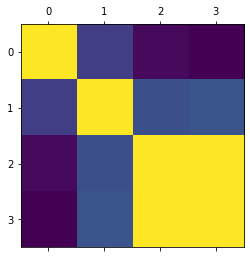

In [79]:
plt.matshow(instagram.corr())
plt.show()

In [80]:
topstreams.describe()

,Streams
count,1.500000e+01
mean,6.719663e+08
std,1.034264e+08
min,5.460369e+08
25%,6.024137e+08
50%,6.244572e+08
75%,7.268617e+08
max,8.833697e+08


In [81]:
topstreams2.describe()

,Streams
count,1.500000e+01
mean,2.513933e+06
std,3.666003e+05
min,2.181000e+06
25%,2.281000e+06
50%,2.430000e+06
75%,2.579000e+06
max,3.327000e+06


In [82]:
online_presence.describe()

,Position
count,25.000000
mean,23.560000
std,14.586181
min,2.000000
25%,13.000000
50%,23.000000
75%,34.000000
max,48.000000


In [83]:
yt.describe()

,Position,Subscribers,Views,Video Count,Release Date
count,15.000000,1.500000e+01,1.500000e+01,15.000000,15.000000
mean,26.733333,7.086667e+07,2.946825e+10,5883.600000,2009.400000
std,10.964010,4.304130e+07,9.709400e+09,7734.268095,2.797958
min,1.000000,5.160000e+07,1.747109e+10,140.000000,2006.000000
25%,20.500000,5.245000e+07,2.386586e+10,612.000000,2007.000000
50%,31.000000,5.340000e+07,2.788178e+10,2313.000000,2009.000000
75%,35.500000,6.875000e+07,3.257833e+10,7243.500000,2011.500000
max,39.000000,2.220000e+08,4.989525e+10,23870.000000,2014.000000


In [84]:
instagram.describe()

,Position,Followers,Authentic engagement,Engagement avg
count,15.000000,1.500000e+01,1.500000e+01,1.500000e+01
mean,50.466667,1.234733e+08,1.954073e+06,2.515053e+06
std,38.908072,6.645101e+07,2.380611e+06,2.806954e+06
min,9.000000,6.230000e+07,2.477000e+05,3.884000e+05
25%,16.500000,7.235000e+07,4.705000e+05,5.803500e+05
50%,47.000000,1.026000e+08,1.200000e+06,1.400000e+06
75%,72.500000,1.560500e+08,1.600000e+06,2.450000e+06
max,118.000000,2.941000e+08,7.500000e+06,8.600000e+06


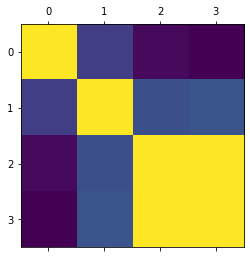

In [85]:
plt.matshow(instagram.corr())
plt.show()

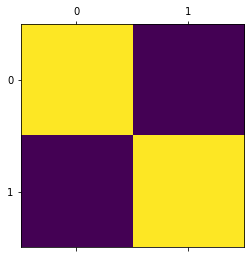

In [86]:
plt.matshow(spotify1.corr())
plt.show()

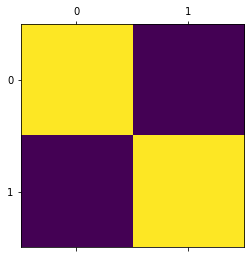

In [87]:
plt.matshow(spotify_2.corr())
plt.show()

In [88]:
agg_df.head()

,Position,Artist,Song,Release Date,Biggest Platform,Streams,Followers,Subscribers,Views,Video Count,Authentic engagement,Engagement avg
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,NaN,NaN,883369738.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Juice WRLD,Lucid Dreams,NaN,NaN,864832399.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lil Uzi Vert,XO TOUR Llif3,NaN,NaN,781153024.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,J. Cole,No Role Modelz,NaN,NaN,734857487.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Post Malone,rockstar,NaN,NaN,718865961.0,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
agg.reset_index
agg.head()

,Position,Artist,Song,Streams,Followers,Subscribers,Views,Video Count,Authentic engagement,Engagement avg
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,883369738.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Juice WRLD,Lucid Dreams,864832399.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lil Uzi Vert,XO TOUR Llif3,781153024.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,J. Cole,No Role Modelz,734857487.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Post Malone,rockstar,718865961.0,NaN,NaN,NaN,NaN,NaN,NaN


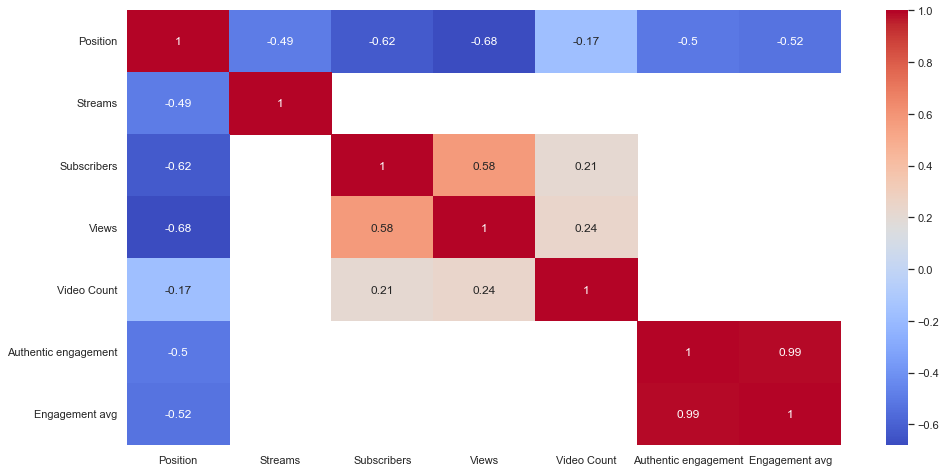

In [90]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = agg.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")

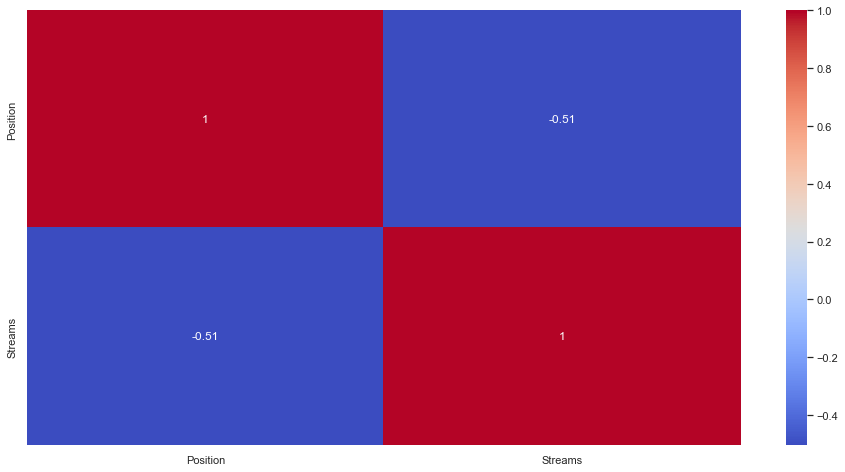

In [91]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = spotify1.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")

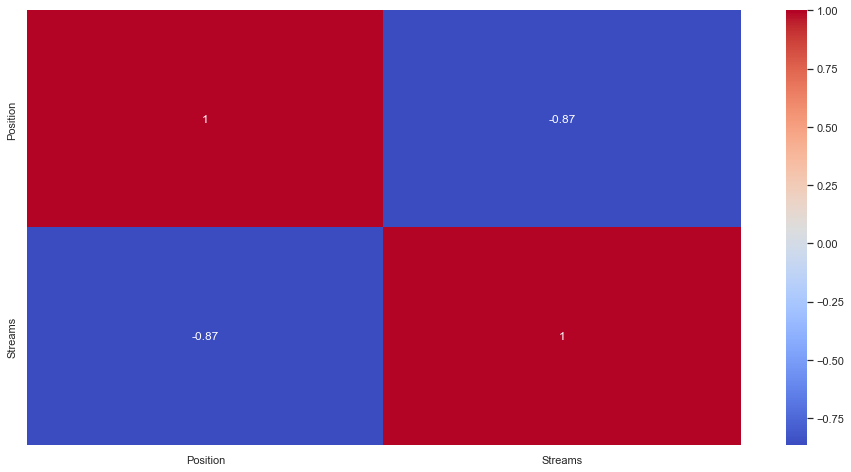

In [92]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr =spotify_2.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")

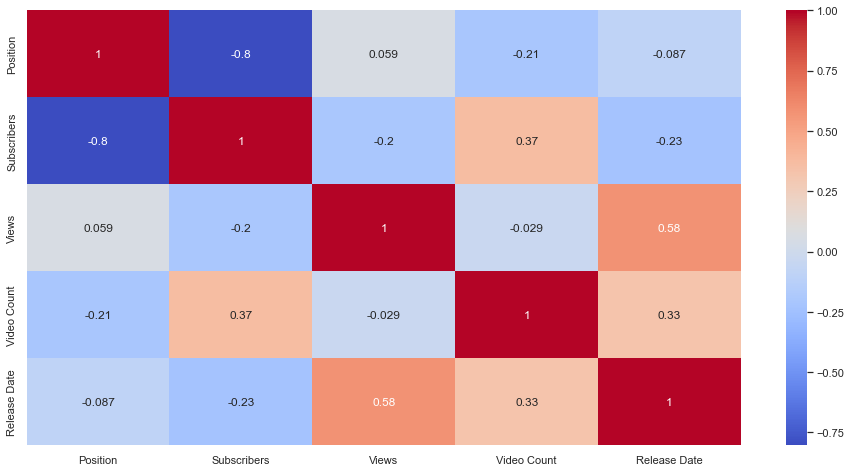

In [93]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = yt.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")

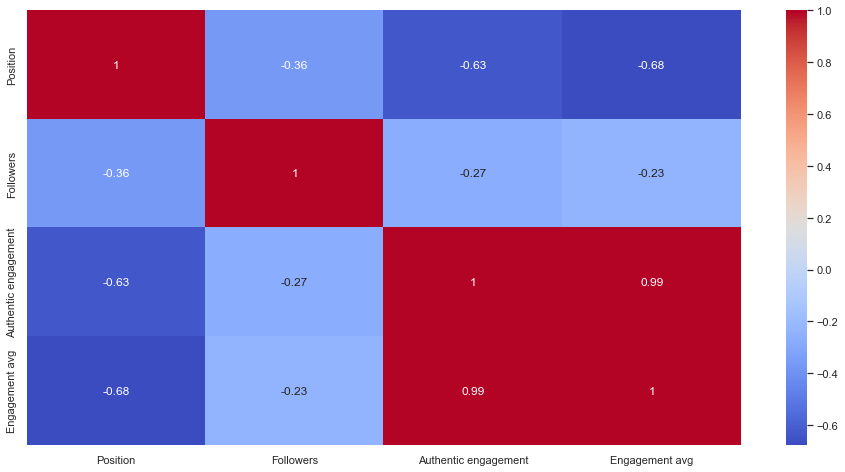

In [94]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = instagram.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")

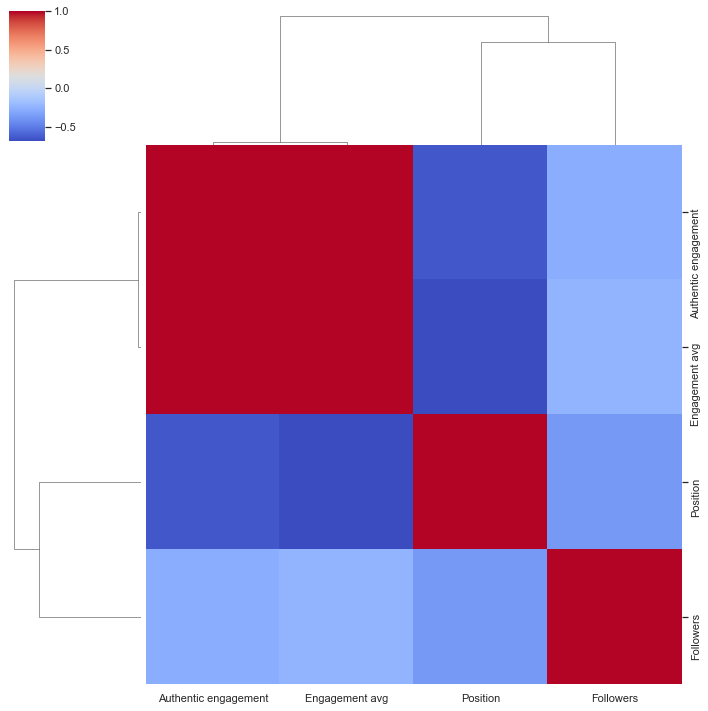

In [95]:
sns.clustermap(corr, cmap="coolwarm")

In [ ]:
# plt.figure(figsize=(16, 8))
# sns.set(style="whitegrid")
# x = agg.groupby("Artist")["Song"].count().sort_values(ascending=False).head(10)
# ax = sns.scatterplot(x, x)
# ax.set_title('Top Streams by Artist')
# ax.set_ylabel('Artist')
# ax.set_xlabel('Song')
# plt.xticks(rotation = 90)

In [ ]:
# plt.figure(figsize=(16, 8))
# sns.set(style="whitegrid")
# x = agg.groupby("Artist")["Streams"].sum().sort_values(ascending=False).head(10)
# ax = sns.barplot(x.index, x)
# ax.set_title('Top Artists with Popularity')
# ax.set_ylabel('Popularity')
# ax.set_xlabel('Artist')
# plt.xticks(rotation = 90)

In [ ]:
# plt.figure(figsize=(16, 8))
# sns.set(style="whitegrid")
# columns = ["Subscribers","Followers","Streams","Views"]
# # for col in columns:
# #     x = agg.groupby("Artist")[col].count()
# #     ax= sns.lineplot(x=x.index,y=x,label=col)
# # ax.set_title('Audio characteristics over year')
# # ax.set_ylabel('Measure')
# # ax.set_xlabel('Year')
# plt.show()

<Figure size 1152x576 with 0 Axes>

In [96]:
agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11614 entries, 0 to 182
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Position              11614 non-null  int64  
 1   Artist                11608 non-null  object 
 2   Song                  11180 non-null  object 
 3   Streams               11184 non-null  float64
 4   Followers             208 non-null    object 
 5   Subscribers           222 non-null    float64
 6   Views                 222 non-null    float64
 7   Video Count           222 non-null    float64
 8   Authentic engagement  183 non-null    float64
 9   Engagement avg        183 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 998.1+ KB


In [97]:
# artists_to_sort=pd.merge(topIG, youtube_popular, how="left",  on=["Artist", "Artist"])
# artists_to_sort.index.name=None
# artists_to_sort.head()
# artists_to_sort

# artists=pdDataFrame({"Artist":["Artist"],
#                      "Instagram Followers": ["Followers"],
#                      "Instagram Rank":["Position_x"],
#                      "Instagram Authentic Engagement": ["Authentic Engagement"]
#                      "YouTube Subscribers": ["Subscribers"],
#                      "YouTube Rank": ["Position_y"]})
                     
                

In [98]:
# df=pd.DataFrame(agg_df)
# print(DataFrame)
# agg_df=df.to_csv('agg.csv', index=True)

In [99]:
# agg_df=agg.groupby('Artist')
# agg_df=agg_df['Streams'].sum().reset_index()
# agg_df.set_index('Artist')
# apply(lambda x: x.sort_values(['Song'], ascending =False))

In [100]:
# list1=agg['Artist'].astype(object)
# list2=agg["Followers"].astype(object)
# list3=agg["Subscribers"]
# corr= pearsonr(list2, list2)


In [101]:
# list1=agg['Artist']
# list2=agg["Followers"]
# list3=agg["Subscribers"]
# corr, _ = pearsonr(list3(xmean=x.mean(dtype=object)), list2(ymean=y.mean(dtype=float64))
#                    #if skipna is None:skipna=True)
# # 

In [102]:
df_i=pd.read_csv('smi_ig.csv')
df_y=pd.read_csv('smi_youtube.csv')
df_i.head()


,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K
3,_imyour_joy,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M
4,_jeongjaehyun,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M


In [103]:
df_y.head()

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K


In [104]:
df_y.isnull().sum()

youtuber name         0
channel name          0
Category            277
Subscribers           0
Audience Country    161
avg views             0
avg likes            38
avg comments        209
dtype: int64

In [105]:
df_i.rename({'category_1':'Category','Audience country(mostly)':'Audience Country'},axis=1,inplace=True)

df_y.rename({'Subscribers':'Followers',},axis=1,inplace=True)
df_i.head()
df_y.head()

,youtuber name,channel name,Category,Followers,Audience Country,avg views,avg likes,avg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K


In [106]:
df_i.isnull().sum()

Influencer insta name         0
instagram name               21
Category                    108
category_2                  713
Followers                     0
Audience Country             14
Authentic engagement\r\n      0
Engagement avg\r\n            0
dtype: int64

In [115]:
df_i.drop_duplicates(subset=['Influencer insta name'],inplace=True)
df_i.shape

(997, 8)

In [116]:
display(df_i.columns)
df_i.head()

Index(['Influencer insta name', 'instagram name', 'Category', 'category_2',
       'Followers', 'Audience Country', 'Authentic engagement\r\n',
       'Engagement avg\r\n'],
      dtype='object')

,Influencer insta name,instagram name,Category,category_2,Followers,Audience Country,Authentic engagement\r\n,Engagement avg\r\n
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K
3,_imyour_joy,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M
4,_jeongjaehyun,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M


In [128]:
df_i.drop(labels=['Influencer insta name','Authentic engagement\r\n'],axis=1,inplace=True)

In [109]:
#df_y.last_valid_index

In [129]:
li=['newFollowers', 'newEngagement']
#,'newEngagement avg\r\n']
#li.append(df_i.iloc[6])

df_i.head()
# li_df=pd.DataFrame(li).T
# li_df.head()


,instagram name,Category,category_2,Followers,Audience Country,Engagement avg\r\n
0,433,Sports with a ball,NaN,48.5M,Spain,637K
1,TAEYANG,Music,NaN,12.7M,Indonesia,542.3K
2,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,377.9K
3,Joy,Lifestyle,NaN,13.5M,Indonesia,1.4M
4,Jaehyun,NaN,NaN,11.1M,Indonesia,3.1M


In [139]:
newFollowers=("Followers")*1000
newEngagement=("Engagment avg\r\n")

TypeError: 'DataFrame' object is not callable

In [154]:
df_i.rename({'Followers':'newFollowers'},axis=1, inplace=True)

df_i.head()
#df_y.head()

,instagram name,Category,category_2,newFollowers,Audience Country,Engagement avg\r\n
0,433,Sports with a ball,NaN,48.5M,Spain,637K
1,TAEYANG,Music,NaN,12.7M,Indonesia,542.3K
2,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,377.9K
3,Joy,Lifestyle,NaN,13.5M,Indonesia,1.4M
4,Jaehyun,NaN,NaN,11.1M,Indonesia,3.1M


In [153]:

df_i.head()

,instagram name,Category,category_2,newFollowers,Audience Country,Engagement avg\r\n
0,433,Sports with a ball,NaN,48.5M,Spain,637K
1,TAEYANG,Music,NaN,12.7M,Indonesia,542.3K
2,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,377.9K
3,Joy,Lifestyle,NaN,13.5M,Indonesia,1.4M
4,Jaehyun,NaN,NaN,11.1M,Indonesia,3.1M


In [155]:
# for coln in df_i:
#     for value in coln:
#         if value =='M':
#             value = '000,000,000'
            

In [142]:
df_i.head()

,instagram name,Category,category_2,newFollowers,Audience Country,Engagement avg\r\n
0,433,Sports with a ball,NaN,48.5M,Spain,637K
1,TAEYANG,Music,NaN,12.7M,Indonesia,542.3K
2,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,377.9K
3,Joy,Lifestyle,NaN,13.5M,Indonesia,1.4M
4,Jaehyun,NaN,NaN,11.1M,Indonesia,3.1M


In [132]:
# Er Formula    ER=(Engagement Average/total Followers)*100

In [172]:
for row in df_i:
    followers=(float(row['newFollowers'])* 1000)


TypeError: string indices must be integers

In [160]:
#df_i['Engagement Rate']=np.round((df_i['Engagement avg\r\n']/df_i['newFollowers'])*100,3)df_i['Engagement Rate']=np.round((df_i['Engagement avg\r\n']/df_i['newFollowers'])*100,3)
df_i['Engagement Rate']=np.round((df_i['Engagement avg\r\n']/df_i['newFollowers'])*100,3)

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [157]:
df_i['Engagement Rate']=np.round(['Engagement avg\r\n']/df_i['newFollowers']*100,3)

TypeError: <class 'list'>